In [1]:
import numpy as np
import pandas as pd

<img src="https://i.imgur.com/TA2wXuV.png" alt="drawing" width="500"/>

$\newcommand{\bi}{\lambda_i(1-\rho)}$
$\newcommand{\si}{(\gamma +\lambda_i + \mu_i)}$
$$
p_i(t) = - \frac{1}{\lambda_i} \frac{(y_i + \bi)x_i e^{-ct} - y_i(x_i + \lambda_i(1-\rho))}{(y_i + \bi) e^{-ct} - (x_i + \lambda_i(1-\rho))}
$$
$$
\begin{align*}
c & = \sqrt{\si^2 - 4 \mu_i(1-\sigma)\lambda_i} \\
x_i & = \frac{-\si - c}{2} \\
y_i & = \frac{-\si + c}{2}
\end{align*}
$$


In [2]:
from math import exp, sqrt

def prob_extinct(γ, λ_i, μ_i, σ, ρ):
    b_i = λ_i*(1-ρ)
    s_i = γ + λ_i + μ_i

    c = sqrt(s_i**2 - 4 * μ_i*(1-σ)*λ_i)
    x_i = (-s_i - c)/2
    y_i = (-s_i + c)/2

    return lambda t: - (1/λ_i) * ((y_i + b_i)*x_i * exp(-c*t) - y_i * (x_i + λ_i*(1-ρ)))/((y_i + b_i) * exp(-c*t) - (x_i + λ_i*(1-ρ)))



In [3]:
px = prob_extinct(γ=1, λ_i=4, μ_i=3, σ=0.2, ρ=1)
px(1)

0.3657340698942307

<AxesSubplot:xlabel='t'>

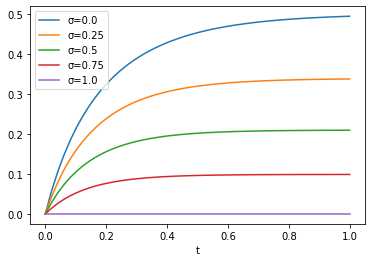

In [4]:
df = pd.DataFrame({"t": np.linspace(0,1)})
for σ in np.linspace(0, 1, 5):
    px = prob_extinct(γ=1, λ_i=4, μ_i=3, σ=σ, ρ=1)
    df[f"{σ=}"] = df["t"].apply(px)
df.set_index("t",inplace=True)
df.plot()